# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/620-mod6-web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [47]:
#import dependenceis 
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import numpy as np


!pip list

print('All prereqs installed.')


Package             Version
------------------- -----------
annotated-types     0.7.0
appnope             0.1.4
asttokens           2.4.1
backcall            0.2.0
beautifulsoup4      4.12.3
blis                0.7.11
catalogue           2.0.10
certifi             2024.8.30
charset-normalizer  3.4.0
click               8.1.7
cloudpathlib        0.20.0
comm                0.2.2
confection          0.1.5
contourpy           1.1.1
cycler              0.12.1
cymem               2.0.10
debugpy             1.8.9
decorator           5.1.1
en-core-web-sm      3.7.1
executing           2.1.0
fonttools           4.55.0
html5lib            1.1
idna                3.10
importlib_metadata  8.5.0
importlib_resources 6.4.5
ipykernel           6.29.5
ipython             8.12.3
jedi                0.19.2
Jinja2              3.1.4
joblib              1.4.2
jupyter_client      8.6.3
jupyter_core        5.7.2
kiwisolver          1.4.7
langcodes           3.4.1
language_data       1.3.0
marisa-trie        

## Question 1
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [48]:
# get article
article_html = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

#parse HTML content with bs4
parser = 'html5lib'

soup = BeautifulSoup(article_html.content, parser)
# Uncomment next lines to explore full page contents; it's long so when done, recomment
#print(soup)
#print(soup.prettify())

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
with open('article_html.pkl', 'wb') as f:
    pickle.dump(soup, f)
    print("HTML saved to article_html.pkl.")


HTML saved to article_html.pkl.


## Question 2
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [49]:
# read in HTML content form pkl file
with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

# find article text 
article_html = soup.find('article')

# print article text 
print(article_html.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [50]:
# load article text into trained spacy pipline
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_html.get_text())

# determine 5 most frequent tokens, converted to lower case, remove punct, stopwords, whitespace
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(lambda token: str(token).lower(), interesting_tokens))
mostFreqtokens = word_freq.most_common(5)

# print common tokens and frequencies with appropriate label
print("Top 5 Most Frequent Tokens:")
for token, freq in mostFreqtokens:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens:
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [51]:
# determine 5 monst frequent lemmas converted to lower case
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
mostFreqlemmas = lemma_freq.most_common(5)

# print with appropriate lemmas
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in mostFreqlemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'light', Frequency: 10


## Question 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [52]:
# Store frequent tokens and lemmas in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

cool_lemmas = set()
for lemma, freq in mostFreqlemmas:
    cool_lemmas.add(lemma)

# Get the first sentence in the document
first_sentence = list(doc.sents)[0]

# Initialize the token count
count = 0

# Loop through the tokens in the first sentence
for token in first_sentence:
    if token.text.lower() in cool_tokens:
        count += 1

# Clean the sentence string (remove newlines and extra whitespace)
sent_str = str(first_sentence).replace('\n', '').replace('  ', ' ')

# Print the count and the sentence text
print(count, ":", sent_str)

# Define score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    # Extract the raw text of the sentence
    sentence_text = sentence.text
    # Tokenize the sentence
    doc = nlp(sentence_text)
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    tokens_score = token_count / len(doc)
    return tokens_score

# Define score_sentence_by_lemma function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Extract the raw text of the sentence
    sentence_text = sentence.text
    # Tokenize the sentence
    doc = nlp(sentence_text)
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    # Return the ratio of interesting lemmas to total tokens
    lemmas_score = lemma_count / len(doc)
    return lemmas_score

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, cool_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, cool_lemmas)

# Print the scores
print(f"Token Score for the first sentence: {token_score}")
print(f"Lemma Score for the first sentence: {lemma_score}")


2 :       How Laser Headlights Work                  130 Comments                    by:        Lewin Day                    March 22, 2021                                            
Token Score for the first sentence: 0.1
Lemma Score for the first sentence: 0.0


## Question 6
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

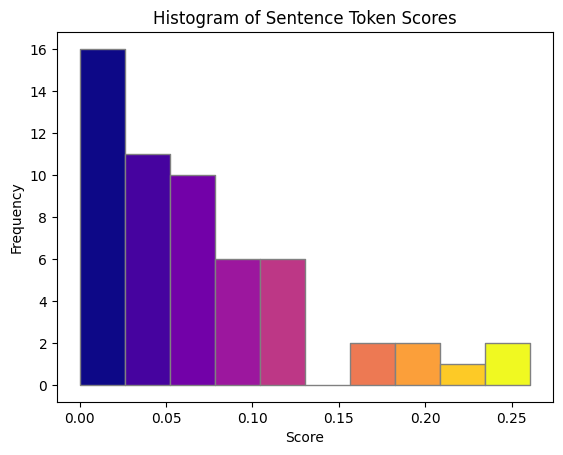

In [53]:
# Store frequent tokens and lemmas in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

# Get every sentence in article 
sentences = list(doc.sents)

# Define score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    token_count = sum(1 for token in sentence if token.text.lower() in interesting_tokens)
    # Return the ratio of interesting tokens to total tokens
    tokens_score = token_count / len(sentence)
    return tokens_score

# Create list to store scores 
sentence_scores = []

# Loop through each sentence and calculate score
for sentence in sentences:
    score = score_sentence_by_token(sentence, cool_tokens)
    sentence_scores.append(score)


# Print the token scores for all sentences
#for i, (sentence, score) in enumerate(zip(sentences, sentence_scores), 1):
    #print(f"Sentence {i}: '{sentence.text.strip()}' - Token Score: {score}")

# Create histogram data
counts, bin_edges = np.histogram(sentence_scores, bins=10)

# Prepare vertices for the PolyCollection
verts = []
for i in range(len(bin_edges) - 1):
    verts.append([
        (bin_edges[i], 0),
        (bin_edges[i], counts[i]),
        (bin_edges[i + 1], counts[i]),
        (bin_edges[i + 1], 0),
    ])

# Create the gradient colors
gradient = np.linspace(0, 1, len(verts))
colors = plt.cm.plasma(gradient)

# Create a PolyCollection with the gradient colors
poly_collection = PolyCollection(verts, facecolors=colors, edgecolor='gray')

# Plot the PolyCollection
fig, ax = plt.subplots()
ax.add_collection(poly_collection)
ax.autoscale()
plt.title("Histogram of Sentence Token Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).